# WeRateDogs of Twitter
The obejctive is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 

# 1. Questions
- How does the rating distribution look like?
- Which type of dog gets the highest ratings?
- Which dog breed gets the most favourite-likes?
- Which dog breed gets the most retweets?

# 2. Wrangle
1. Data Gathering
1. Data Assessment
1. Data Cleaning

## 2.1 Data Gathering
- WeRateDogs account data from uc .csv (df_account_data)
- Extra info API data from Twitter (df_tw)
- Image predictions from uc server (df_images)

In [59]:
import pandas as pd
import numpy as np
import requests 
import tweepy 
import json 
import matplotlib.pyplot as plt


In [14]:
# account data
df_account_data = pd.read_csv('twitter-archive-enhanced.csv')

# Twitter stats API
keys = pd.read_csv('twitter_keys.csv')
consumer_key = keys.twitter_key[keys.key_type == 'consumer_key']
consumer_secret = keys.twitter_key[keys.key_type == 'consumer_secret']
access_token = keys.twitter_key[keys.key_type == 'access_token']
access_secret = keys.twitter_key[keys.key_type == 'access_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_account_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        # print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
print(fails_dict)

# Read json file line by line into a pandas DataFrame & extract id, favourite_count and retweet_count
df_tw = pd.read_json('tweet_json.txt', lines=True)
df_tw = df_tw[['id', 'favorite_count', 'retweet_count']]

# image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')



Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Fail
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


## 2.2 Data Assessment

In [28]:
# visual assessment of account data
df_account_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [34]:
# visual assessment - look in a spreadsheet program
df_account_data.to_csv('account_data.csv')

### Visual Inspection Findings 

**df_account_data**
_Quality Issues_
- Validity issue in the name column, where a is a name.
- Accuracy issue with None in the name column
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id 

_Tidyness Issues_
- The variable dog stage can be found in different columns
- Retweet data is found in the tweet table

The four main data quality dimensions are:

- **Completeness**: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- **Validity**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- **Accuracy**: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
- **Consistency**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

In [12]:
# programmatic assessment account data
df_account_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [249]:
# programmatic assessment account data
df_account_data[df_account_data.retweeted_status_id.notnull() == True]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [39]:
# programmatic assessment account data
df_account_data.describe()[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [148]:
# programmatic assessment account data
df_account_data.tweet_id.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2356, dtype: bool

In [149]:
# programmatic assessment account data
df_account_data.tweet_id.nunique()

2356

In [40]:
# programmatic assessment account data
df_account_data.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [44]:
# programmatic assessment account data
df_account_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

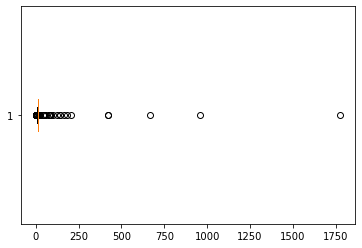

In [74]:
plt.boxplot(df_account_data.rating_numerator, vert = False);


In [42]:
# programmatic assessment account data
df_account_data.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [43]:
# programmatic assessment account data
df_account_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

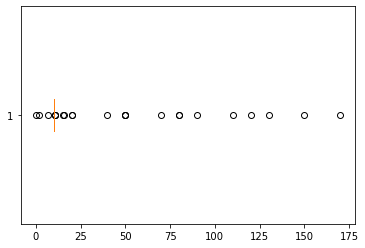

In [76]:
plt.boxplot(df_account_data.rating_denominator, vert = False);

### Programmatics Inspection Findings

**df_account_data**
_Quality Issues_
- Validity numerator up to 1776 valid?
- Validity issue denominator 0-170, should be 10 (right?)
- Accuracy issue with varying denominator
- Accuracy issue with very high std in numerator
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp

_Tidyness Issues_
- The variable dog stage can be found in different columns
- Retweet data is found in the tweet table

### Findings Summary df_account_data
**df_account_data**
_Quality Issues_
- Validity issue in the name column, where a is a name.
- Accuracy issue with None in the name column
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id 
- Validity numerator up to 1776 valid?
- Validity issue denominator 0-170, should be 10 (right?)
- Accuracy issue with varying denominator
- Accuracy issue with very high std in numerator
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp

_Tidyness Issues_
- All data from the observational unit (the tweet) is in one table
- Retweet data is found in the tweet table
- The variable dog stage can be found in different columns

In [45]:
# visual assessment - look in a spreadsheet program
df_tw.to_csv('tweet_data.csv') # fine

In [46]:
# programmatic assessment tweet data
df_tw.info() # fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2328 non-null   int64
 1   favorite_count  2328 non-null   int64
 2   retweet_count   2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [51]:
# programmatic assessment tweet data
df_tw.describe()[['favorite_count', 'retweet_count']].round() # fine
# no comment

,favorite_count,retweet_count
count,2328.0,2328.0
mean,7405.0,2631.0
std,11501.0,4451.0
min,0.0,1.0
25%,1288.0,534.0
50%,3212.0,1230.0
75%,9068.0,3053.0
max,152667.0,75568.0


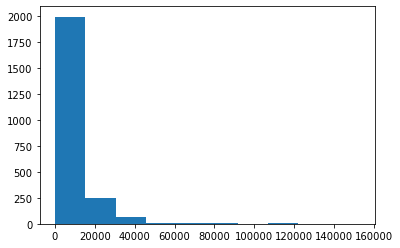

In [62]:
# programmatic assessment tweet data
plt.hist(df_tw.favorite_count);


In [79]:
# programmatic assessment tweet data
df_tw.favorite_count.sort_values()

999          0
544          0
439          0
186          0
187          0
         ...  
1055    112895
129     114076
517     117882
397     130250
1015    152667
Name: favorite_count, Length: 2328, dtype: int64

In [78]:
# programmatic assessment tweet data
df_tw.favorite_count.value_counts()

0        163
405        4
409        4
1584       3
2591       3
        ... 
21069      1
4687       1
10832      1
25169      1
11912      1
Name: favorite_count, Length: 1972, dtype: int64

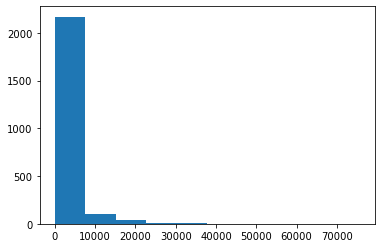

In [80]:
# programmatic assessment tweet data
plt.hist(df_tw.retweet_count);


In [81]:
# programmatic assessment tweet data
df_tw.retweet_count.sort_values()

279         1
1271        2
262         2
328         2
109         3
        ...  
65      39646
397     42556
517     55091
1055    56242
1015    75568
Name: retweet_count, Length: 2328, dtype: int64

In [82]:
# programmatic assessment tweet data
df_tw.retweet_count.value_counts()

41       5
1038     5
547      5
51       5
112      5
        ..
6100     1
27878    1
4063     1
1438     1
2058     1
Name: retweet_count, Length: 1680, dtype: int64

### Findings Summary df_tw
_Tidyness_
- Tidyness issue, all tweet data in the same table

In [ ]:
# visual assessment image predictions
# already present as file - opened in spreadsheet program

In [83]:
# programmatic assessment image prediction
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [90]:
# programmatic assessment image prediction
image_predictions.p1_conf.sort_values(ascending=False).round(2)

106     1.00
1299    1.00
1229    1.00
149     1.00
1372    1.00
        ... 
246     0.07
1370    0.06
1093    0.06
136     0.06
38      0.04
Name: p1_conf, Length: 2075, dtype: float64

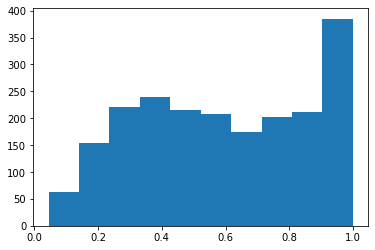

In [93]:
plt.hist(image_predictions.p1_conf);

In [89]:
# programmatic assessment image prediction
image_predictions.p2_conf.sort_values(ascending=False).round(2)

986     0.49
1756    0.47
1514    0.46
232     0.46
72      0.45
        ... 
1372    0.00
230     0.00
1229    0.00
1299    0.00
106     0.00
Name: p2_conf, Length: 2075, dtype: float64

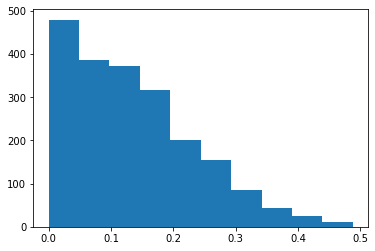

In [94]:
plt.hist(image_predictions.p2_conf);

In [91]:
# programmatic assessment image prediction
image_predictions.p3_conf.sort_values(ascending=False).round(2)

1071    0.27
1080    0.27
97      0.27
123     0.26
1613    0.25
        ... 
1299    0.00
1760    0.00
1906    0.00
149     0.00
106     0.00
Name: p3_conf, Length: 2075, dtype: float64

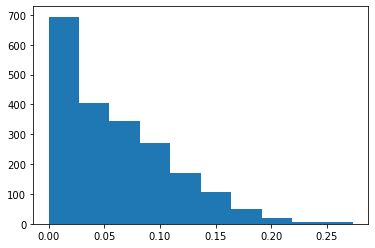

In [95]:
plt.hist(image_predictions.p3_conf);

In [108]:
# programmatic assessment image prediction
image_predictions.p1[image_predictions.p1_dog == True].value_counts()
                           
                           

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
Scotch_terrier          1
clumber                 1
Japanese_spaniel        1
groenendael             1
standard_schnauzer      1
Name: p1, Length: 111, dtype: int64

In [109]:
# programmatic assessment image prediction
image_predictions.p2[image_predictions.p2_dog == True].value_counts()
     

Labrador_retriever      104
golden_retriever         92
Cardigan                 73
Chihuahua                44
Pomeranian               42
                       ... 
standard_schnauzer        1
komondor                  1
Bernese_mountain_dog      1
Japanese_spaniel          1
EntleBucher               1
Name: p2, Length: 113, dtype: int64

### Findings Summary image_prediction
**image_predictions**

_Quality Issues_
- Consitency datatype tweet_id
- Consistency issue in p1, p2 and p3 columns, first letter
- Consistency issue in p1, p2 and p3 columns, len - round()
- Consistency p1_dog, p2_dog, p3_dog boolean in capital letters
- Treashold for true?

_Tidyness Issues_
- img_num unnecessary column
- The table also contains daat from the same observationa unit (the tweet) and should therefore be in the same table as the account_data 
- The table could have been arranged differently with p, p_conf and p_dog as variables

### Findings Summary
**df_account_data**
_Quality Issues_
- Validity issue in the name column, where a is a name. (fix? No)
- Accuracy issue with None in the name column (fix? No)
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data) (fix first Upper letter)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id (fix)
- Validity numerator up to 1776 valid? (dont have information to fix)
- Validity issue denominator 0-170, should be 10 (right?)(dont have information to fix)
- Accuracy issue with varying denominator
- Accuracy issue with very high std in numerator
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str (fix)
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp (fix)

_Tidyness Issues_
- All data from the observational unit (the tweet) is in one table 
- Retweet data is found in the tweet table (fix)
- The variable dog stage can be found in different columns (fix)

**df_tw**
_Tidyness_
- Tidyness issue, all tweet is not data in the same table (fix)

**image_predictions**

_Quality Issues_
- Consitency datatype tweet_id (fix)
- Consistency issue in p1, p2 and p3 columns, first letter (fix)
- Consistency issue in p1, p2 and p3 columns, len - round() (fix)
- Consistency p1_dog, p2_dog, p3_dog boolean in capital letters (fix)
- Treashold for true? (dont have information to fix)

_Tidyness Issues_
- img_num unnecessary column (dont fix, not so serious issue)
- The table also contains daat from the same observationa unit (the tweet) and should therefore be in the same table as the account_data (fix)
- The table could have been arranged differently with p, p_conf and p_dog as variables (dont fix)

### Choosing 8 quality issues and 2 tidyness issues to work with
**df_account_data**

_Quality Issues_
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data) (fix first Upper letter)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id (fix)
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str (fix)
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp (fix)

_Tidyness Issues_
- Retweet data is found in the tweet table (fix)
- The variable dog stage can be found in different columns (fix)

**df_tw**
_Tidyness_
- Tidyness issue, all tweet is not data in the same table (fix)

**image_predictions**

_Quality Issues_
- Consitency datatype tweet_id (fix)
- Consistency issue in p1, p2 and p3 columns, first letter (fix)
- Consistency issue in p1, p2 and p3 columns, len - round() (fix)
- Consistency p1_dog, p2_dog, p3_dog boolean in capital letters (fix)

_Tidyness Issues_
- The table also contains data from the same observational unit (the tweet) and should therefore be in the same table as the account_data (fix)

## 2.3 Data Cleaning

1. Create a copy of your data
1. Addressing quality completeness issues (missing data) first
1. Addressing tidyness issues second
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table.
4. Adressing the rest of the quality issues third
- Adressing validity
- Adressing accuracy
- Adressing consistency


### 2.3.1 Create Copies

In [239]:
df_account_data_clean = df_account_data.copy()
df_tw_clean = df_tw.copy()
image_predictions_clean = image_predictions.copy()

### 2.3.1 Missing Data
I choosed to now work with the missing data since I dont have any information of how it can be retrieved, treated or recovered.

### 2.3.2 Tidyness Issues

#### Define
`The variable dog stage can be found in different columns (fix)`

Melt and unpivot the columns dog_stages into rows in a new column called dog_stage.

In [232]:
df_account_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Code

In [240]:
#
df_account_data_clean = pd.melt(df_account_data_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'] , value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name = 'dog_stage')




In [241]:
df_account_data_clean = df_account_data_clean.drop(labels = 'value', axis = 1)

#### Test

In [237]:
df_account_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo


In [242]:
df_account_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  dog_stage                   9424 

#### Define
`Tidyness issue, all tweet data is not in the same table`

Concat df_account_data and df_tw.

#### Code

In [243]:
df_twitter_data = pd.concat([df_account_data_clean, df_tw_clean], axis = 1)
df_twitter_data_clean = df_twitter_data.copy()

#### Test

In [225]:
df_twitter_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,8.924206e+17,35418.0,7481.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,8.921774e+17,30641.0,5550.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,8.918152e+17,23050.0,3673.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,8.916896e+17,38714.0,7655.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,8.913276e+17,36978.0,8257.0


In [244]:
df_twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  dog_stage                   9424 

#### Define
`Retweet data is found in df_account_data_clean`

Remove (drop) the retweet data from the clean table.

#### Code

In [199]:
# df_account_data_clean.drop(labels = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [200]:
# df_account_data_clean.head() # columns dropped

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2.3.3 Quality Issues

#### Define
`Validity`

Remove non orgiginal (retweets or replies) tweets from the data set and also remove all tweets < 1st Aug 2017.

In [281]:
df_twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  dog_stage                   9424 

#### Help! - Code 

In [278]:
# df_twitter_data_clean.set_index('tweet_id')

In [287]:
retweet_data = df_twitter_data_clean[df_twitter_data_clean.retweeted_status_id.notnull()]['tweet_id']


In [ ]:
replies = df_twitter_data_clean[df_twitter_data_clean.in_reply_to_status_id.notnull()]



In [286]:
df_twitter_data_clean.drop(retweet_labels, axis = 1)

KeyError: '[888202515573088257 886054160059072513 885311592912609280\n 879130579576475649 878404777348136964 878316110768087041\n 877611172832227328 874434818259525634 873697596434513921\n 873337748698140672 872668790621863937 871166179821445120\n 869988702071779329 868639477480148993 867072653475098625\n 866816280283807744 866094527597207552 863471782782697472\n 861769973181624320 860981674716409858 860924035999428608\n 860177593139703809 858860390427611136 857062103051644929\n 856602993587888130 856330835276025856 855245323840757760\n 855138241867124737 852936405516943360 851953902622658560\n 851861385021730816 849668094696017920 847978865427394560\n 847971574464610304 845459076796616705 845098359547420673\n 842892208864923648 841833993020538882 840761248237133825\n 840728873075638272 839290600511926273 838916489579200512\n 838831947270979586 838201503651401729 837012587749474308\n 836648853927522308 836397794269200385 835685285446955009\n 835536468978302976 835309094223372289 834477809192075265\n 833732339549220864 832769181346996225 832215909146226688\n 832215726631055365 832040443403784192 830173239259324417\n 829878982036299777 828801551087042563 827228250799742977\n 826615380357632002 825120256414846976 824796380199809024\n 823719002937630720 823269594223824897 822647212903690241\n 822163064745328640 821813639212650496 821421320206483457\n 820837357901512704 820494788566847489 820446719150292993\n 820013781606658049 819015337530290176 819015331746349057\n 818646164899774465 818588835076603904 818307523543449600\n 817502432452313088 817181837579653120 816829038950027264\n 816062466425819140 816014286006976512 815745968457060357\n 814578408554463233 813944609378369540 812747805718642688\n 809808892968534016 808134635716833280 807059379405148160\n 806620845233815552 806242860592926720 805958939288408065\n 805823200554876929 804413760345620481 803692223237865472\n 803321560782307329 802624713319034886 802247111496568832\n 802185808107208704 801127390143516673 800855607700029440\n 800443802682937345 800188575492947969 799774291445383169\n 799308762079035393 798705661114773508 798701998996647937\n 798697898615730177 798694562394996736 798686750113755136\n 798682547630837760 798673117451325440 798665375516884993\n 798644042770751489 798628517273620480 798585098161549313\n 798576900688019456 798340744599797760 796904159865868288\n 796563435802726400 796177847564038144 794983741416415232\n 794355576146903043 793614319594401792 791821351946420224\n 791784077045166082 791780927877898241 791026214425268224\n 790723298204217344 790227638568808452 789960241177853952\n 789280767834746880 788552643979468800 788070120937619456\n 787111942498508800 786729988674449408 786036967502913536\n 783347506784731136 782021823840026624 780496263422808064\n 780476555013349377 780092040432480260 779124354206535695\n 778774459159379968 778396591732486144 777953400541634568\n 777641927919427584 776819012571455488 776249906839351296\n 775898661951791106 775096608509886464 773336787167145985\n 772615324260794368 771171053431250945 771004394259247104\n 770743923962707968 770093767776997377 769335591808995329\n 768909767477751808 768554158521745409 766864461642756096\n 766078092750233600 763167063695355904 761750502866649088\n 761371037149827077 760153949710192640 759566828574212096\n 759159934323924993 757729163776290825 757597904299253760\n 754874841593970688 753298634498793472 752701944171524096\n 752309394570878976 747242308580548608 746521445350707200\n 743835915802583040 711998809858043904 667550904950915073\n 667550882905632768 888202515573088257 886054160059072513\n 885311592912609280 879130579576475649 878404777348136964\n 878316110768087041 877611172832227328 874434818259525634\n 873697596434513921 873337748698140672 872668790621863937\n 871166179821445120 869988702071779329 868639477480148993\n 867072653475098625 866816280283807744 866094527597207552\n 863471782782697472 861769973181624320 860981674716409858\n 860924035999428608 860177593139703809 858860390427611136\n 857062103051644929 856602993587888130 856330835276025856\n 855245323840757760 855138241867124737 852936405516943360\n 851953902622658560 851861385021730816 849668094696017920\n 847978865427394560 847971574464610304 845459076796616705\n 845098359547420673 842892208864923648 841833993020538882\n 840761248237133825 840728873075638272 839290600511926273\n 838916489579200512 838831947270979586 838201503651401729\n 837012587749474308 836648853927522308 836397794269200385\n 835685285446955009 835536468978302976 835309094223372289\n 834477809192075265 833732339549220864 832769181346996225\n 832215909146226688 832215726631055365 832040443403784192\n 830173239259324417 829878982036299777 828801551087042563\n 827228250799742977 826615380357632002 825120256414846976\n 824796380199809024 823719002937630720 823269594223824897\n 822647212903690241 822163064745328640 821813639212650496\n 821421320206483457 820837357901512704 820494788566847489\n 820446719150292993 820013781606658049 819015337530290176\n 819015331746349057 818646164899774465 818588835076603904\n 818307523543449600 817502432452313088 817181837579653120\n 816829038950027264 816062466425819140 816014286006976512\n 815745968457060357 814578408554463233 813944609378369540\n 812747805718642688 809808892968534016 808134635716833280\n 807059379405148160 806620845233815552 806242860592926720\n 805958939288408065 805823200554876929 804413760345620481\n 803692223237865472 803321560782307329 802624713319034886\n 802247111496568832 802185808107208704 801127390143516673\n 800855607700029440 800443802682937345 800188575492947969\n 799774291445383169 799308762079035393 798705661114773508\n 798701998996647937 798697898615730177 798694562394996736\n 798686750113755136 798682547630837760 798673117451325440\n 798665375516884993 798644042770751489 798628517273620480\n 798585098161549313 798576900688019456 798340744599797760\n 796904159865868288 796563435802726400 796177847564038144\n 794983741416415232 794355576146903043 793614319594401792\n 791821351946420224 791784077045166082 791780927877898241\n 791026214425268224 790723298204217344 790227638568808452\n 789960241177853952 789280767834746880 788552643979468800\n 788070120937619456 787111942498508800 786729988674449408\n 786036967502913536 783347506784731136 782021823840026624\n 780496263422808064 780476555013349377 780092040432480260\n 779124354206535695 778774459159379968 778396591732486144\n 777953400541634568 777641927919427584 776819012571455488\n 776249906839351296 775898661951791106 775096608509886464\n 773336787167145985 772615324260794368 771171053431250945\n 771004394259247104 770743923962707968 770093767776997377\n 769335591808995329 768909767477751808 768554158521745409\n 766864461642756096 766078092750233600 763167063695355904\n 761750502866649088 761371037149827077 760153949710192640\n 759566828574212096 759159934323924993 757729163776290825\n 757597904299253760 754874841593970688 753298634498793472\n 752701944171524096 752309394570878976 747242308580548608\n 746521445350707200 743835915802583040 711998809858043904\n 667550904950915073 667550882905632768 888202515573088257\n 886054160059072513 885311592912609280 879130579576475649\n 878404777348136964 878316110768087041 877611172832227328\n 874434818259525634 873697596434513921 873337748698140672\n 872668790621863937 871166179821445120 869988702071779329\n 868639477480148993 867072653475098625 866816280283807744\n 866094527597207552 863471782782697472 861769973181624320\n 860981674716409858 860924035999428608 860177593139703809\n 858860390427611136 857062103051644929 856602993587888130\n 856330835276025856 855245323840757760 855138241867124737\n 852936405516943360 851953902622658560 851861385021730816\n 849668094696017920 847978865427394560 847971574464610304\n 845459076796616705 845098359547420673 842892208864923648\n 841833993020538882 840761248237133825 840728873075638272\n 839290600511926273 838916489579200512 838831947270979586\n 838201503651401729 837012587749474308 836648853927522308\n 836397794269200385 835685285446955009 835536468978302976\n 835309094223372289 834477809192075265 833732339549220864\n 832769181346996225 832215909146226688 832215726631055365\n 832040443403784192 830173239259324417 829878982036299777\n 828801551087042563 827228250799742977 826615380357632002\n 825120256414846976 824796380199809024 823719002937630720\n 823269594223824897 822647212903690241 822163064745328640\n 821813639212650496 821421320206483457 820837357901512704\n 820494788566847489 820446719150292993 820013781606658049\n 819015337530290176 819015331746349057 818646164899774465\n 818588835076603904 818307523543449600 817502432452313088\n 817181837579653120 816829038950027264 816062466425819140\n 816014286006976512 815745968457060357 814578408554463233\n 813944609378369540 812747805718642688 809808892968534016\n 808134635716833280 807059379405148160 806620845233815552\n 806242860592926720 805958939288408065 805823200554876929\n 804413760345620481 803692223237865472 803321560782307329\n 802624713319034886 802247111496568832 802185808107208704\n 801127390143516673 800855607700029440 800443802682937345\n 800188575492947969 799774291445383169 799308762079035393\n 798705661114773508 798701998996647937 798697898615730177\n 798694562394996736 798686750113755136 798682547630837760\n 798673117451325440 798665375516884993 798644042770751489\n 798628517273620480 798585098161549313 798576900688019456\n 798340744599797760 796904159865868288 796563435802726400\n 796177847564038144 794983741416415232 794355576146903043\n 793614319594401792 791821351946420224 791784077045166082\n 791780927877898241 791026214425268224 790723298204217344\n 790227638568808452 789960241177853952 789280767834746880\n 788552643979468800 788070120937619456 787111942498508800\n 786729988674449408 786036967502913536 783347506784731136\n 782021823840026624 780496263422808064 780476555013349377\n 780092040432480260 779124354206535695 778774459159379968\n 778396591732486144 777953400541634568 777641927919427584\n 776819012571455488 776249906839351296 775898661951791106\n 775096608509886464 773336787167145985 772615324260794368\n 771171053431250945 771004394259247104 770743923962707968\n 770093767776997377 769335591808995329 768909767477751808\n 768554158521745409 766864461642756096 766078092750233600\n 763167063695355904 761750502866649088 761371037149827077\n 760153949710192640 759566828574212096 759159934323924993\n 757729163776290825 757597904299253760 754874841593970688\n 753298634498793472 752701944171524096 752309394570878976\n 747242308580548608 746521445350707200 743835915802583040\n 711998809858043904 667550904950915073 667550882905632768\n 888202515573088257 886054160059072513 885311592912609280\n 879130579576475649 878404777348136964 878316110768087041\n 877611172832227328 874434818259525634 873697596434513921\n 873337748698140672 872668790621863937 871166179821445120\n 869988702071779329 868639477480148993 867072653475098625\n 866816280283807744 866094527597207552 863471782782697472\n 861769973181624320 860981674716409858 860924035999428608\n 860177593139703809 858860390427611136 857062103051644929\n 856602993587888130 856330835276025856 855245323840757760\n 855138241867124737 852936405516943360 851953902622658560\n 851861385021730816 849668094696017920 847978865427394560\n 847971574464610304 845459076796616705 845098359547420673\n 842892208864923648 841833993020538882 840761248237133825\n 840728873075638272 839290600511926273 838916489579200512\n 838831947270979586 838201503651401729 837012587749474308\n 836648853927522308 836397794269200385 835685285446955009\n 835536468978302976 835309094223372289 834477809192075265\n 833732339549220864 832769181346996225 832215909146226688\n 832215726631055365 832040443403784192 830173239259324417\n 829878982036299777 828801551087042563 827228250799742977\n 826615380357632002 825120256414846976 824796380199809024\n 823719002937630720 823269594223824897 822647212903690241\n 822163064745328640 821813639212650496 821421320206483457\n 820837357901512704 820494788566847489 820446719150292993\n 820013781606658049 819015337530290176 819015331746349057\n 818646164899774465 818588835076603904 818307523543449600\n 817502432452313088 817181837579653120 816829038950027264\n 816062466425819140 816014286006976512 815745968457060357\n 814578408554463233 813944609378369540 812747805718642688\n 809808892968534016 808134635716833280 807059379405148160\n 806620845233815552 806242860592926720 805958939288408065\n 805823200554876929 804413760345620481 803692223237865472\n 803321560782307329 802624713319034886 802247111496568832\n 802185808107208704 801127390143516673 800855607700029440\n 800443802682937345 800188575492947969 799774291445383169\n 799308762079035393 798705661114773508 798701998996647937\n 798697898615730177 798694562394996736 798686750113755136\n 798682547630837760 798673117451325440 798665375516884993\n 798644042770751489 798628517273620480 798585098161549313\n 798576900688019456 798340744599797760 796904159865868288\n 796563435802726400 796177847564038144 794983741416415232\n 794355576146903043 793614319594401792 791821351946420224\n 791784077045166082 791780927877898241 791026214425268224\n 790723298204217344 790227638568808452 789960241177853952\n 789280767834746880 788552643979468800 788070120937619456\n 787111942498508800 786729988674449408 786036967502913536\n 783347506784731136 782021823840026624 780496263422808064\n 780476555013349377 780092040432480260 779124354206535695\n 778774459159379968 778396591732486144 777953400541634568\n 777641927919427584 776819012571455488 776249906839351296\n 775898661951791106 775096608509886464 773336787167145985\n 772615324260794368 771171053431250945 771004394259247104\n 770743923962707968 770093767776997377 769335591808995329\n 768909767477751808 768554158521745409 766864461642756096\n 766078092750233600 763167063695355904 761750502866649088\n 761371037149827077 760153949710192640 759566828574212096\n 759159934323924993 757729163776290825 757597904299253760\n 754874841593970688 753298634498793472 752701944171524096\n 752309394570878976 747242308580548608 746521445350707200\n 743835915802583040 711998809858043904 667550904950915073\n 667550882905632768] not found in axis'

#### Test

In [250]:
df_twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  dog_stage                   9424 